# Credit Card Fraud Detection

### Overview 

In this project, I am trying to answer a very important question:
**Can the credit card fraud be predicted before authorization to stop it from happening?**

Credit card frauds are common. It happens for multiple reasons like due to stolen identity, lost credit card or when hackers hack the company's data. It's important to identify the fraud so that consumers aren't charged for the transaction(s) that they did not execute. It not only affects the consumers whose credit card was involved in the fraud but also costs millions to credit card company as most card companies provide protection to cardholders against frauds.

Adding fraud detection mechanism to card transactions might bring some inconvenience to cardholders, especially for False Positive cases, as they would have to confirm if they recognized the transaction (tagged as potential fraud) before transaction is approved by the card company. But in the end, avoiding the fraud is of greater importance than a minor inconvenience of confirming transaction's validity.


### Business Objective

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Business would like to get a tool that could predict if a given credit card transaction is likely a fraud or legit.

Business may not mind a certain percentage of false positive identification (labeling a genuine transaction as fraud) but avoiding false negatives (labeling a fraud transaction as genuine) is extremely important espcially for large amount transactions.

### Data Set Description

I am using the dataset from Kaggle which can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

As per details given at Kaggle, the dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This dataset does not contain actual feature names but rather are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Class' is the target variable and it takes value 1 in case of fraud and 0 otherwise.


### Step 1: Read the Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call, check_call
from warnings import filterwarnings
filterwarnings("ignore")

### Read the Card Transactions Data

In [2]:
# The CSV file is huge 143MB. Keeping the data in zipfile and reading from it
data = pd.read_csv('data/creditcard.zip', compression = 'zip')

# # if it's preferred to read data directly from CSV file then simply extract the zipped file in the data folder
# # Comment the above code to read from zip file and uncomment below line to read it from CSV file
# data = pd.read_csv("data/creditcard.csv")

In [3]:
# Display data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Credit Card Transaction Data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Transaction Data -  rows: 284807  columns: 31


In [5]:
# Display the statistics of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Display column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for Missing Data

In [7]:
data.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

**There is no missing data in the card transactions dataset**

In [8]:
# Check the value count of the Class values
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**There are 284315 Legit Transactions and 492 Fraud Transactions.
Fraud Transactions are only ~0.18% of Total Transactions**

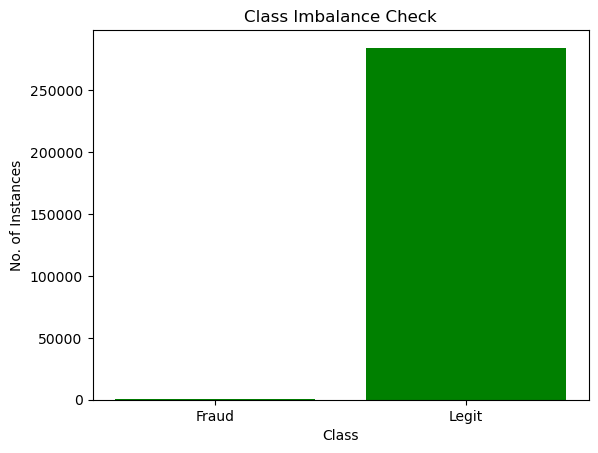

In [9]:
# Visualize the target feature distribution
fraud = list(data['Class'])
count_per_class = {'Fraud' : fraud.count(1), 'Legit' : fraud.count(0)}

plt.bar([0, 1], count_per_class.values(), color='green')
plt.xlabel('Class')
plt.ylabel('No. of Instances')
plt.title('Class Imbalance Check')
plt.xticks([0, 1], ['Fraud', 'Legit'])
plt.show()

### Exploratory Data Analysis (EDA)

**Aggregate Values of Transaction Amount Per Hour**

Assuming the given time is in seconds, we can convert it to hour and apply aggregate functions on it.

In [10]:
# Create new Hour feature by converting Time which was captured in seconds
data_tmp = data.copy()
data_tmp['Hour'] = data_tmp['Time'].apply(lambda x: np.floor(x / 3600))

agg = data_tmp.groupby(['Hour', 'Class'])['Amount'].aggregate(['sum', 'mean', 'median','min', 'max', 'count']).reset_index()
agg_df = pd.DataFrame(agg)
agg_df.columns = ['Hour', 'Class', 'Sum', 'Mean', 'Median', 'Min', 'Max', 'Txn_Count']
agg_df.head()

,Hour,Class,Sum,Mean,Median,Min,Max,Txn_Count
0,0.0,0,256572.87,64.774772,12.990,0.0,7712.43,3961
1,0.0,1,529.00,264.500000,264.500,0.0,529.00,2
2,1.0,0,145806.76,65.826980,22.820,0.0,1769.69,2215
3,1.0,1,298.93,149.465000,149.465,59.0,239.93,2
4,2.0,0,106989.39,68.803466,17.900,0.0,4002.88,1555


**Visualize Total Transactions Amount Per Hour**

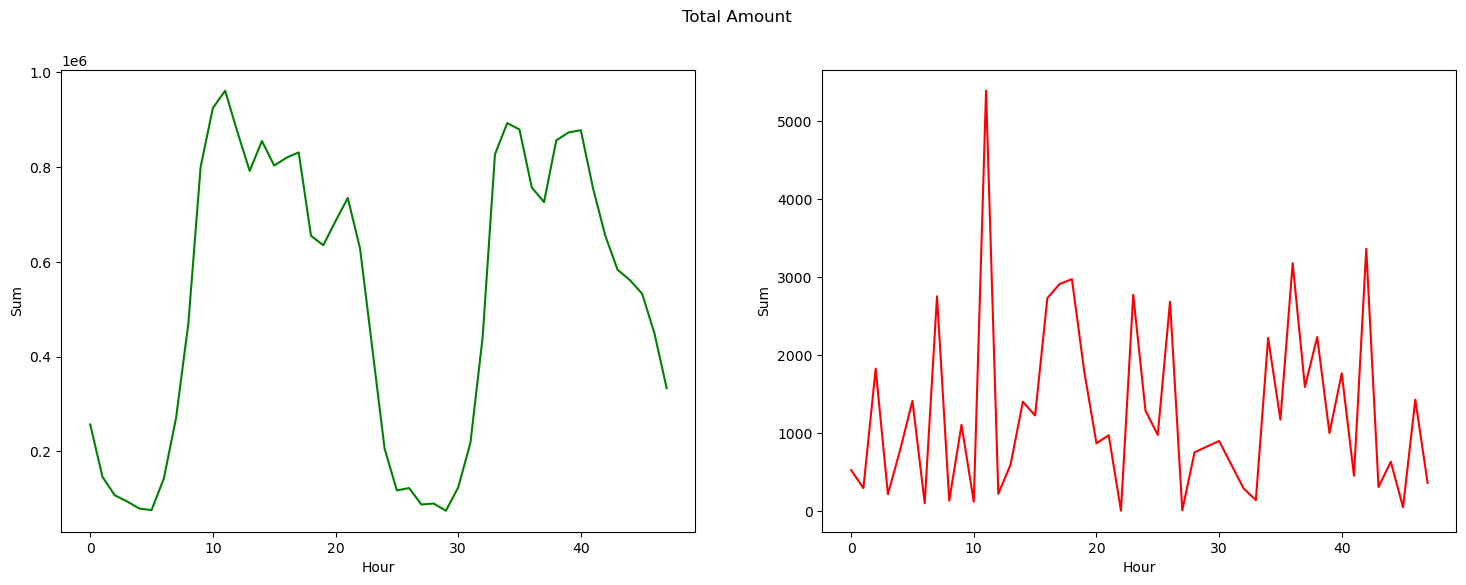

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

**Visualize Average Transactions Amount Per Hour**

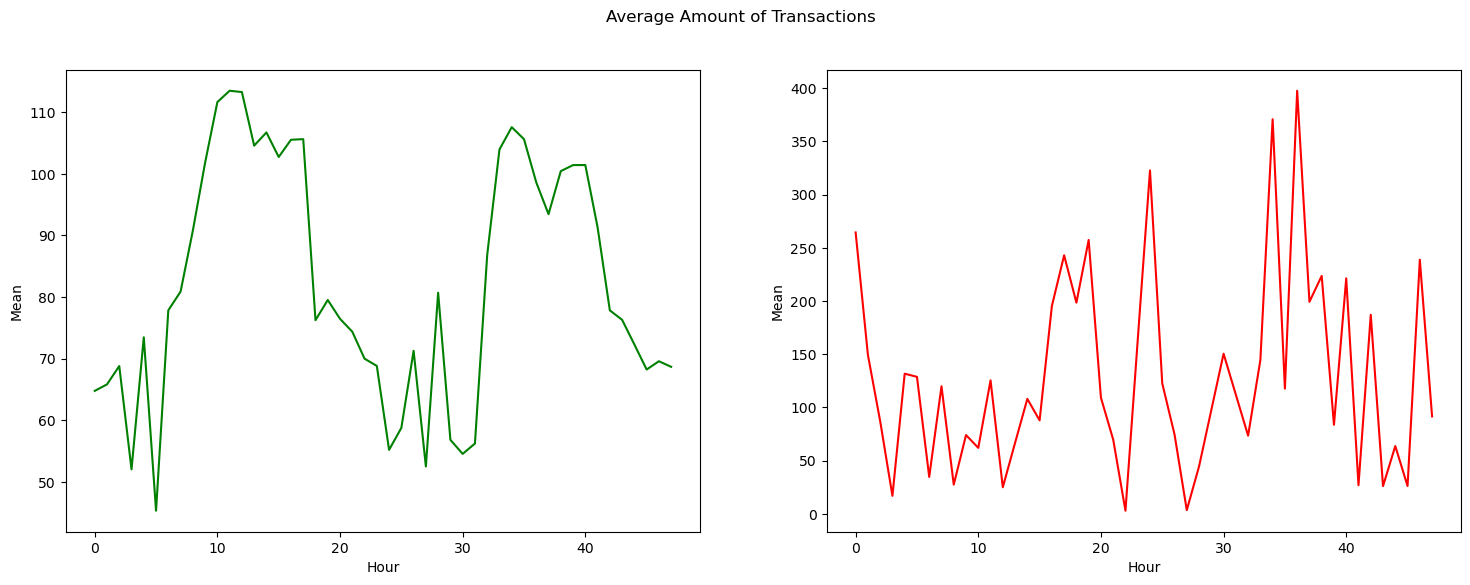

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

**Visualize Median Transactions Amount Per Hour**

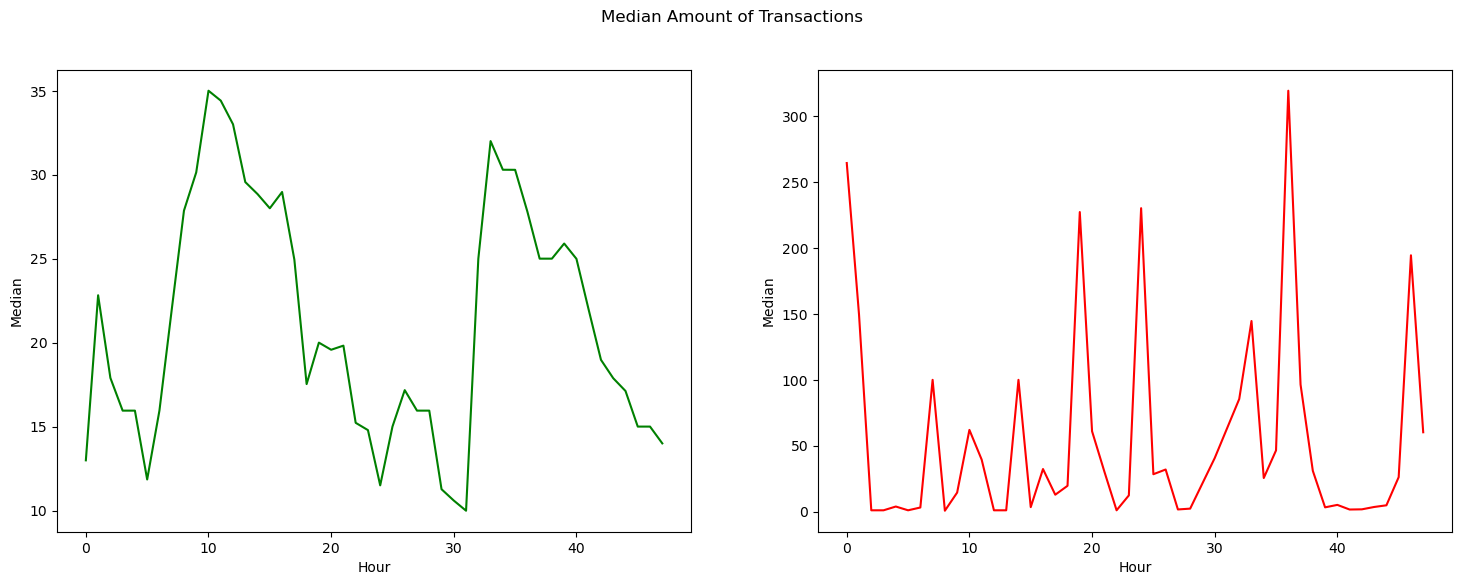

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

**Visualize Minimum Transactions Amount Per Hour**

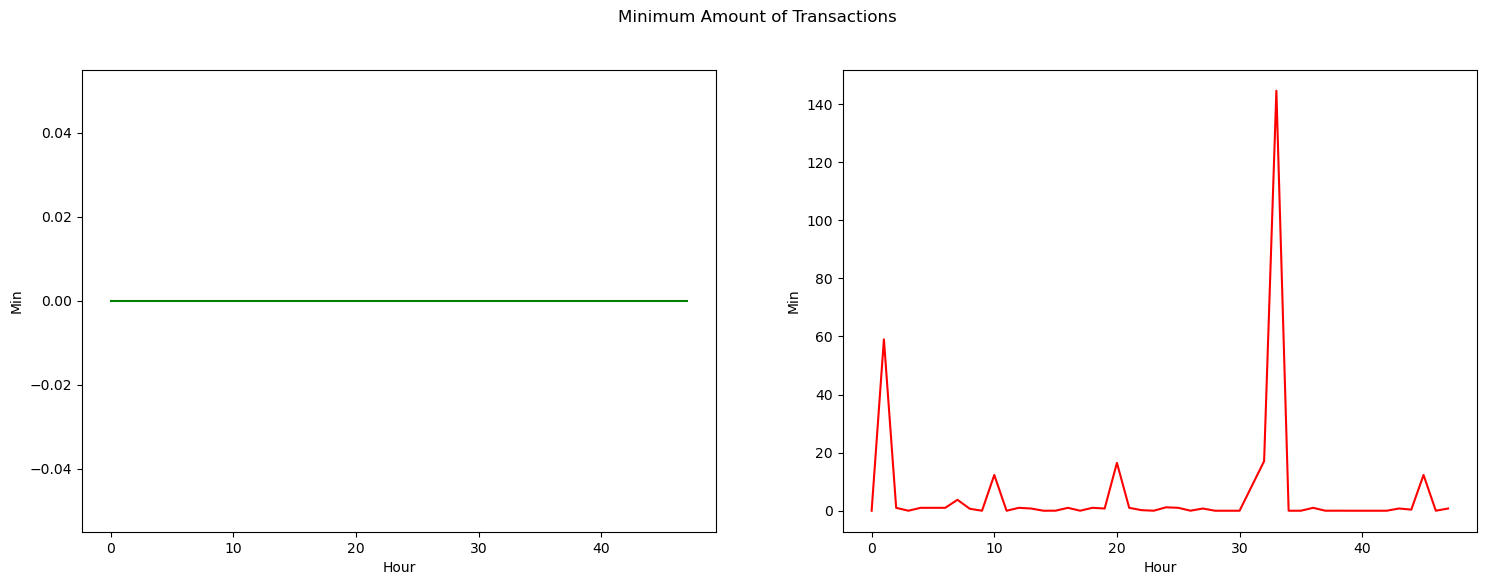

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

**Visualize Maximum Transactions Amount Per Hour**

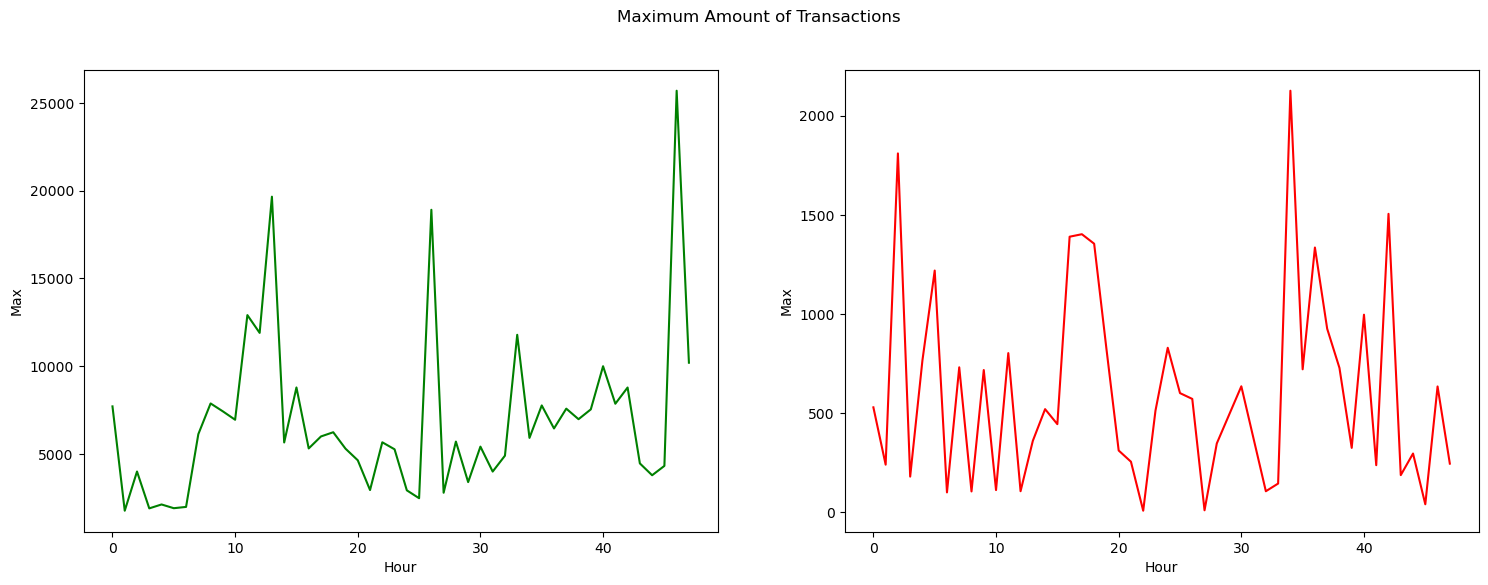

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

**Visualize Total Number of Transactions Per Hour**

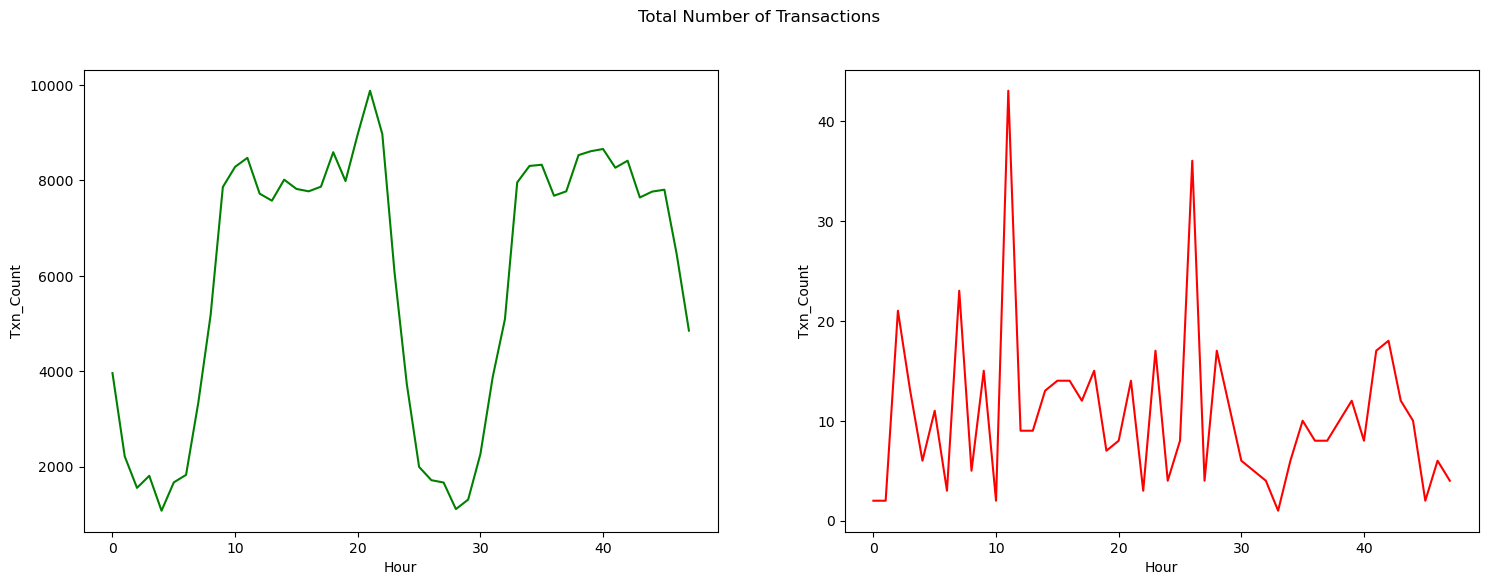

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Txn_Count", data=agg_df.loc[agg_df.Class==0], color="green")
s = sns.lineplot(ax = ax2, x="Hour", y="Txn_Count", data=agg_df.loc[agg_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

**Card Transaction Amount**

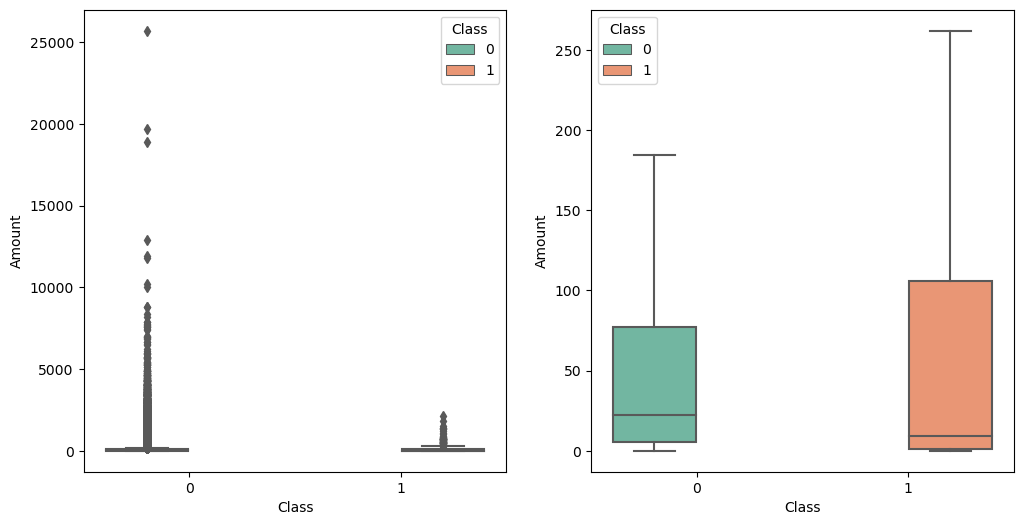

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="Set2",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="Set2",showfliers=False)
plt.show();

### Feature Correlation

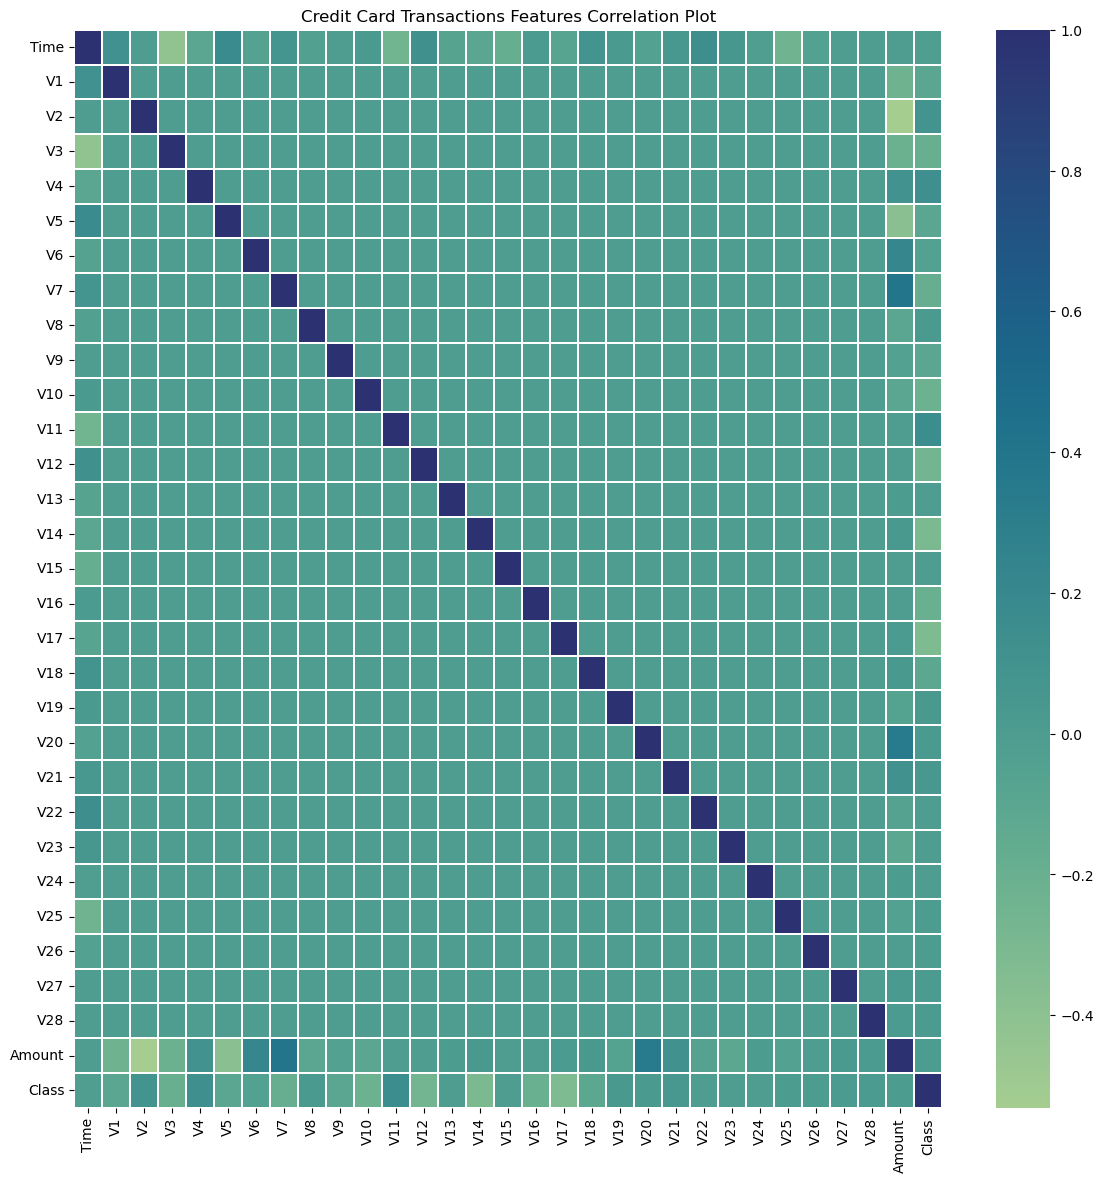

In [18]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions Features Correlation Plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="crest")
plt.show()

**Observations**
- As expected, there is no notable correlation between features **V1**-**V28**. There are certain correlations between some of these features and **Time** (inverse correlation with **V3**) and **Amount** (direct correlation with **V7** and **V20**, inverse correlation with **V2** and **V5**).

### Checking Features Correlation with Class

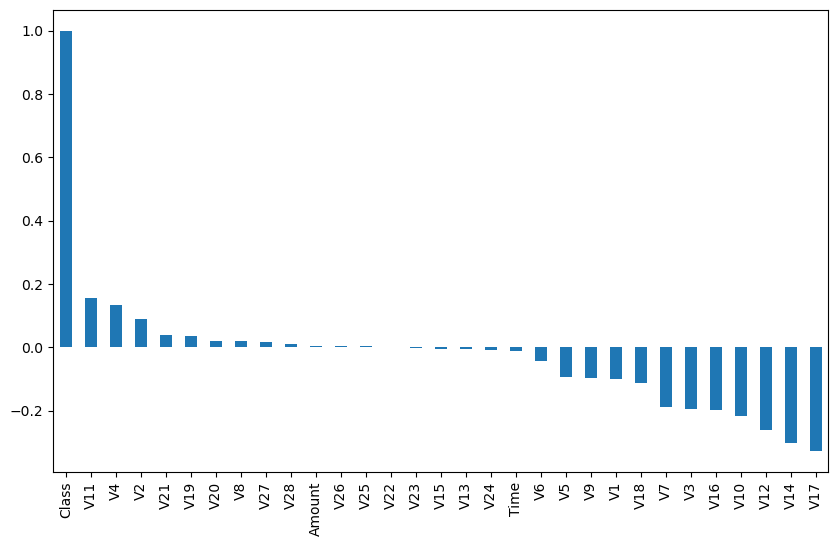

In [19]:
corr = data.corr()

plt.figure(figsize = (10,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
corr['Class'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

**Observations**
- Features V11, V4, V2 have strong positive correlation with Class i.e. as their value increases, there are higher chances of that transaction being a Fraud transaction.
- Features V17, V14, V12, V10 have strong negative correlation with Class i.e. as their value decreases, there are higher chances of that transaction being a Fraud transaction.

#### Let's plot the Correlated and Inverse Correlated values with respect to Amount feature on the same graph.

**First with the direct correlated values: (V20:Amount) and (V7:Amount).**

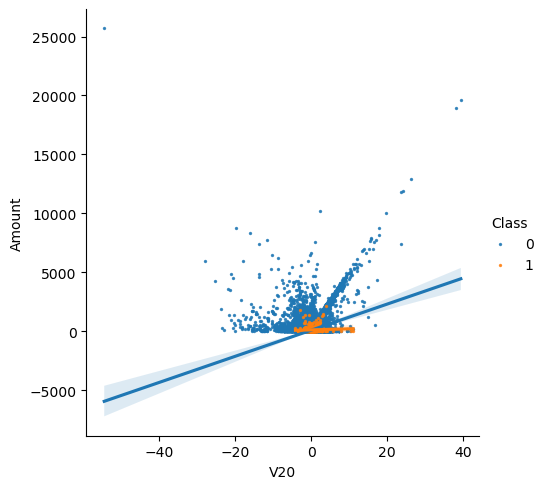

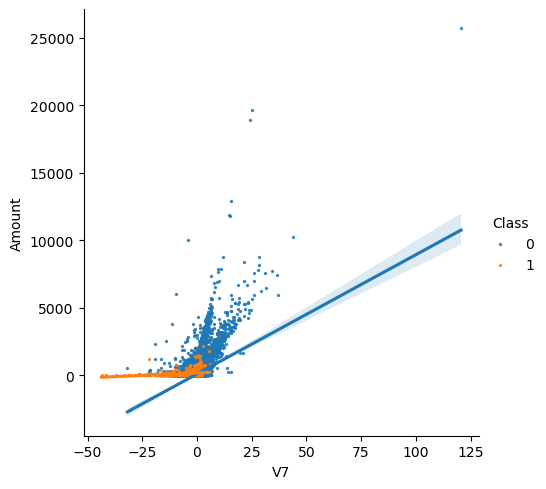

In [20]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

**Observations**
- It's clear that the pair of features are correlated (the regression lines for **Class = 0** have a positive slope, whilst the regression line for **Class = 1** have a smaller positive slope).

**Let's plot the inverse correlated values : (V2:Amount) and (V5:Amount).**

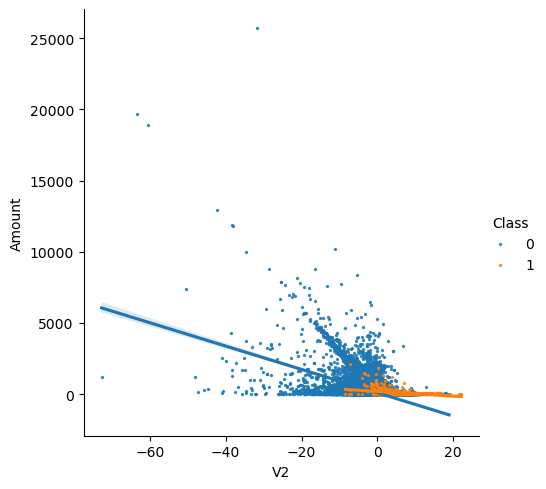

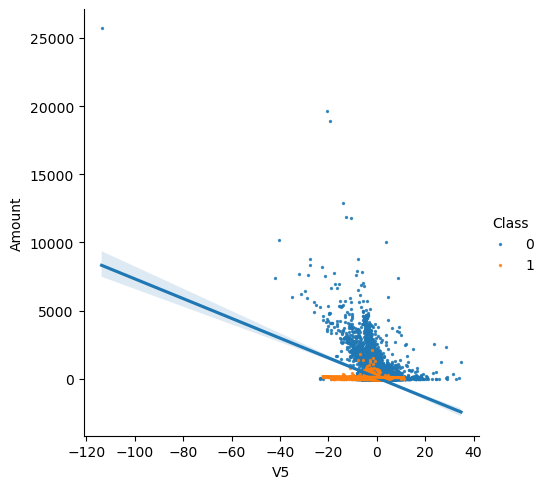

In [21]:
s = sns.lmplot(x='V2', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

**Observations**
- It's clear that the pair of features are inverse correlated (the regression lines for **Class = 0** have a negative slope while the regression lines for **Class = 1** have a very small negative slope).

### Feartures Density Plot

<Figure size 640x480 with 0 Axes>

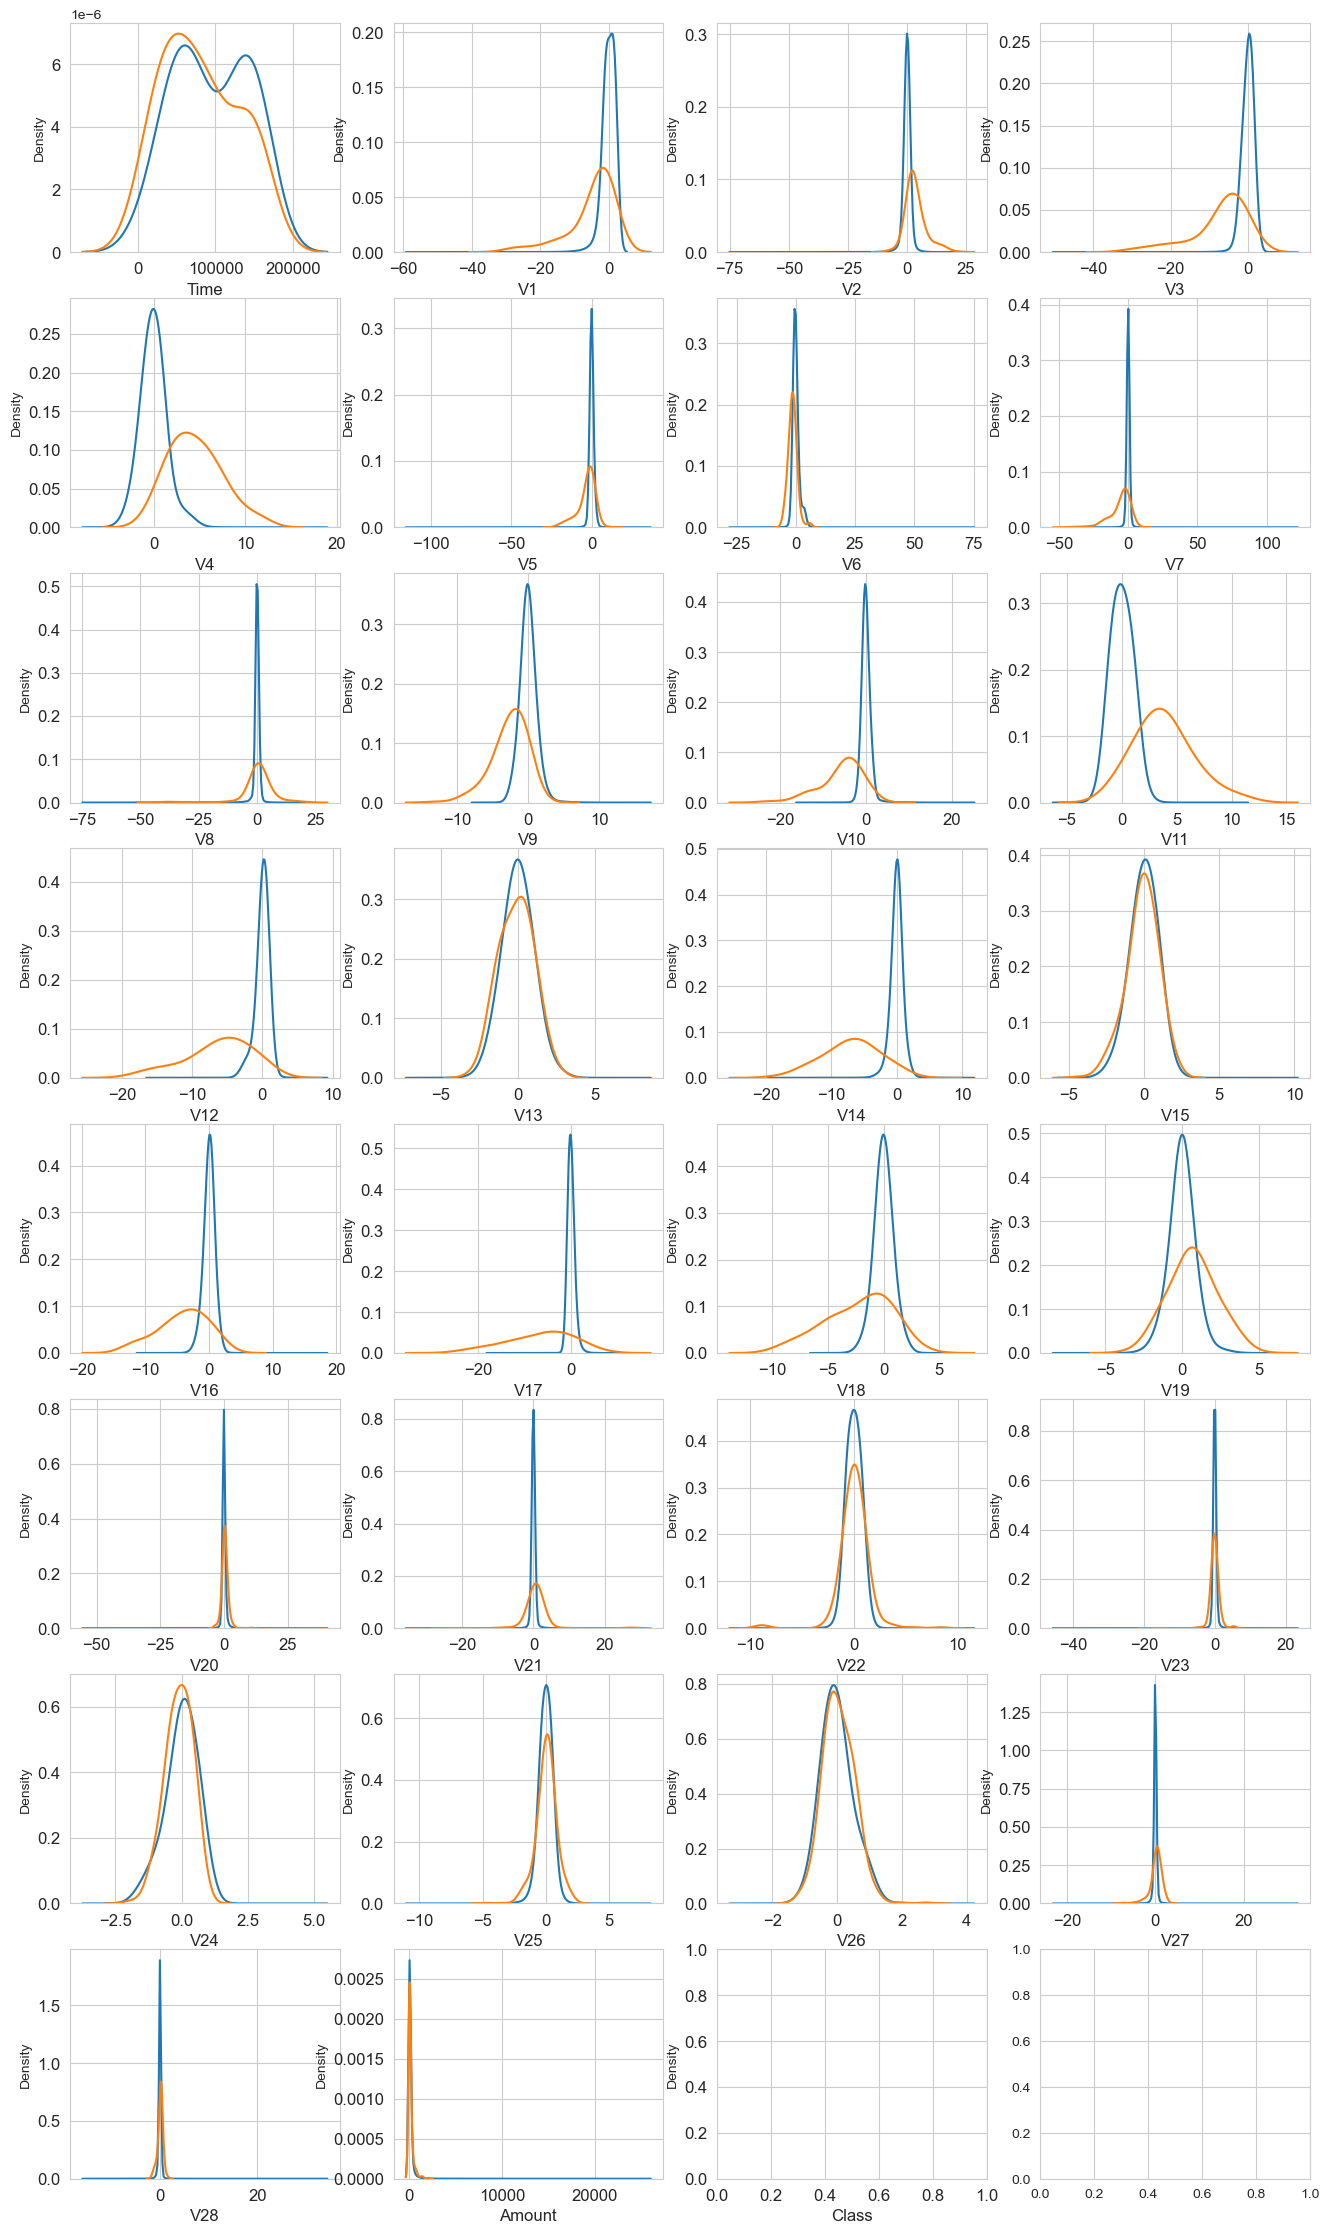

In [22]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**Observations**
- **V4**, **V11** have clearly separated distributions for **Class** values 0 and 1.
- **V12**, **V14**, **V18** are partially separated
- **V1**, **V2**, **V3**, **V10** have a quite distinct profile
- **V25**, **V26**, **V28** have similar profiles for the two values of **Class**.  

In general, with just few exceptions (**Time** and **Amount**), the features distribution for legitimate transactions (values of **Class = 0**)  is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of **Class = 1**) have a skewed (asymmetric) distribution.

### Predictive/Classifier Models

In [23]:
# Create X, y dataframes
X = data.drop(['Class'], axis = 1)
y = data['Class']

### Define Predictors and Target features

Let's define the predictor and the target features. There are no categorical feature in this dataset.

In [24]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
              'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 
              'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Split the dataset in Train and Test Sets

In [25]:
# Define the train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 42, shuffle=True)

**Create a dataframe to track the Model Results**

In [26]:
# Create a dataframe to track the model results
results_df = pd.DataFrame(index=['Precision', 'Recall', 'PR AUC'])

**Define a common function to plot the Precision-Recall Curve**

In [27]:
# Define a function to generate PR Curve
def plot_pr_curve(y_test, model_probs, model_name):
    # calculate the precision-recall auc
    model_precision, model_recall, model_threshold = precision_recall_curve(y_test, model_probs)
    model_auc_score = auc(model_recall, model_precision)
    print(f"Results for {model_name}:")
    print(f"    Average Precision: {np.mean(model_precision)}")
    print(f"    Average Recall   : {np.mean(model_recall)}")
    print(f"    Average Threshold: {np.mean(model_threshold)}")
    print(f"    ")
    print(f"    PR AUC           : {model_auc_score}")
    
    # Save the results
    results_data = []
    results_data.append(np.mean(model_precision)*100)
    results_data.append(np.mean(model_recall)*100)
    results_data.append(model_auc_score*100)
    results_df[model_name] = results_data
    
    # plot precision-recall curves
    plt.plot(model_recall, model_precision, label=model_name)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

### Start with a Basic Model

### Logistic Regression

In [28]:
# Let's create the basic model
lgr = LogisticRegression(max_iter=1000)

In [29]:
# Let's fit the model on the training dataset
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Let's predict the target values
lgr_preds = lgr.predict(X_test)

### Features Importance (LogisticRegression)

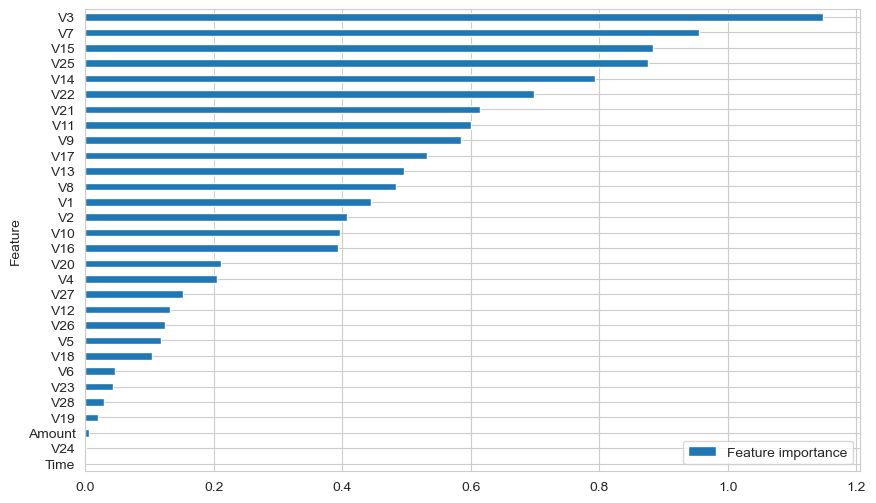

In [31]:
# Let's plot the important features
feature_importance = pd.DataFrame({'Feature': predictors, 'Feature importance': np.abs(lgr.coef_[0])})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=True)
feature_importance.plot(x='Feature', y='Feature importance', kind='barh', figsize=(10, 6)).legend(loc='lower right')

**Observations**
- Most important features are **Hour, V3, V7, V25, V15, V14**
- 3 least important features are **Time, V24, Amount**

### Confusion Matrix (Logistic Regression)

In [32]:
lgr_conf_matrix = confusion_matrix(y_test, lgr_preds)

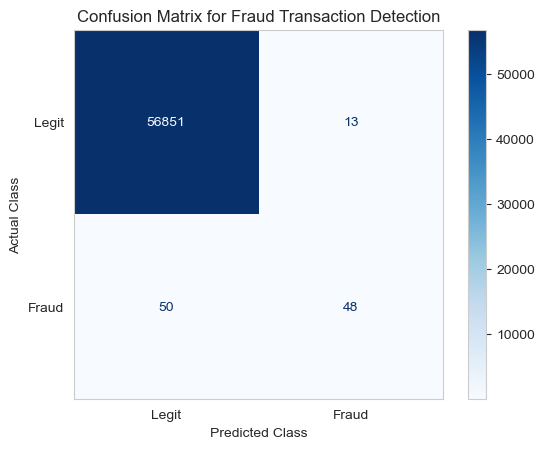

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=lgr_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (LogisticRegression)

Results for Logistic Regression (Base):
    Average Precision: 0.010530466928194046
    Average Recall   : 0.9480668159147954
    Average Threshold: 0.0020049144397925323
    
    PR AUC           : 0.5730567504357673


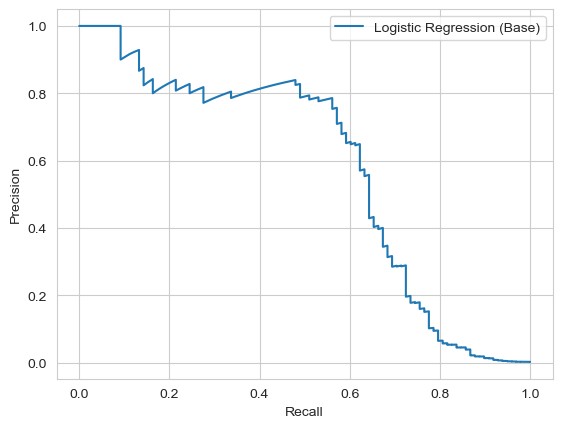

In [34]:
# Display the PR Curve
lgr_yhat = lgr.predict_proba(X_test)
lgr_probs = lgr_yhat[:, 1]

plot_pr_curve(y_test, lgr_probs, 'Logistic Regression (Base)')

### Random Forest Classifier

In [35]:
# Let's create the model
rfc = RandomForestClassifier(n_jobs=4, random_state=42, criterion='gini', n_estimators=100, verbose=False)

In [36]:
# Let's fit the model on the training dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [37]:
# Let's predict the target values
rfc_preds = rfc.predict(X_test)

### Features Importance (RandomForestClassifier)

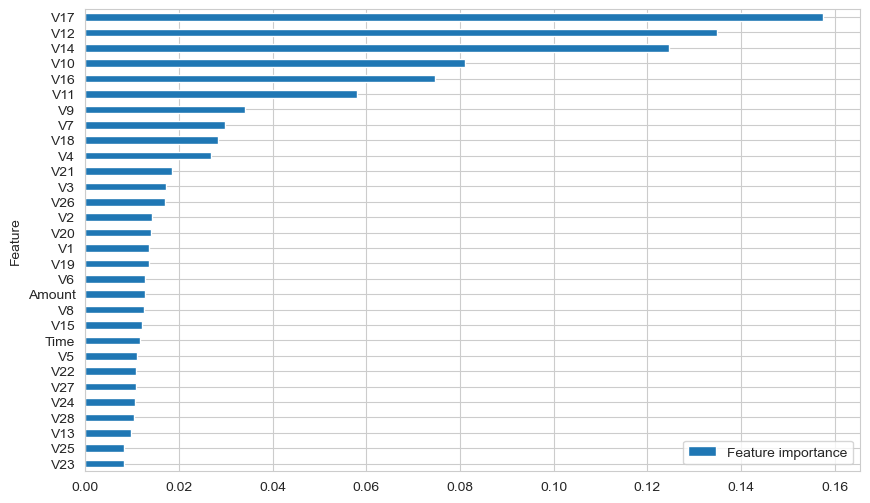

In [38]:
# Let's plot the important features
feature_importance = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=True)
feature_importance.plot(x='Feature', y='Feature importance', kind='barh', figsize=(10, 6)).legend(loc='lower right')

**Observations**
- Most important features are **V17, V12, V14, V10, V16, V11**
- 3 least important features are **V23, V25, V13**

### Confusion Matrix (Random Forest Classifier)

In [39]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_preds)

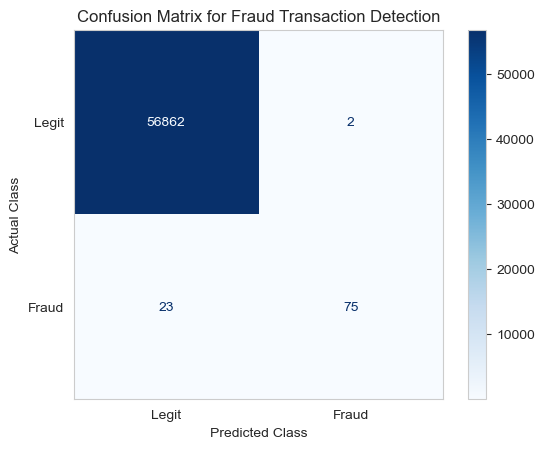

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=rfc_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (RandomForestClassifier)

Results for Random Forest (Base):
    Average Precision: 0.8700044246556297
    Average Recall   : 0.6737833594976451
    Average Threshold: 0.51671875
    
    PR AUC           : 0.8685488292193113


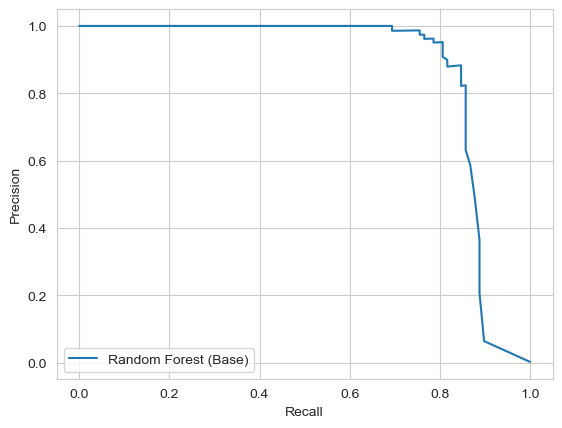

In [41]:
# Display PR Curve
rfc_yhat = rfc.predict_proba(X_test)
rfc_probs = rfc_yhat[:, 1]

plot_pr_curve(y_test, rfc_probs, 'Random Forest (Base)')

### XGBoost

In [42]:
# Create base XGBoost Model
xgb_model = xgb.XGBClassifier()

In [43]:
# Let's fit the model on the training dataset
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Features Importance (XGBoost)

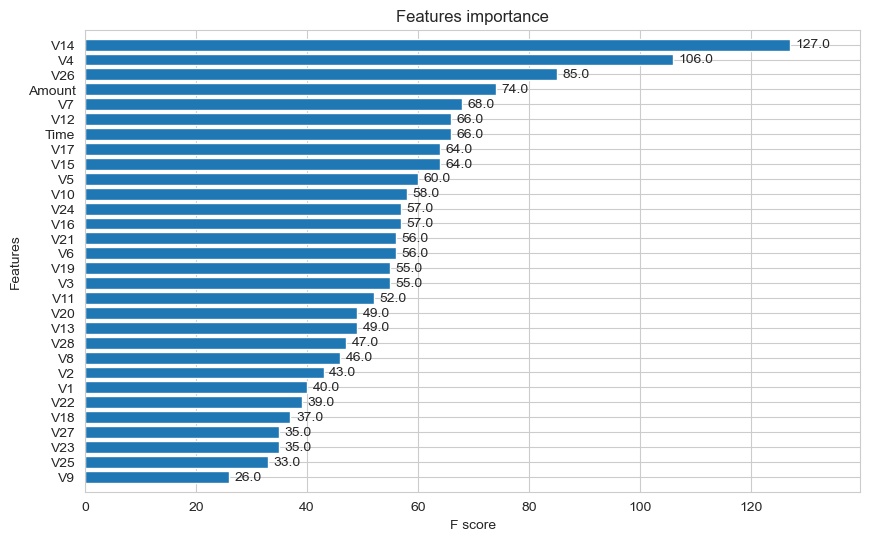

In [44]:
# Let's plot the important features
fig, (ax) = plt.subplots(ncols=1, figsize=(10,6))
xgb.plot_importance(xgb_model, height=0.8, title="Features importance", ax=ax) 
plt.show()

**Observations**
- Most important features are **V14, V4, V26, Amount, V7, V12**
- 3 least important features are **V9, V25, V23**

In [45]:
# Let's predict the target values
xgb_preds = xgb_model.predict(X_test)

### Confusion Matrix (XGBoost)

In [46]:
# Create the confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_preds)

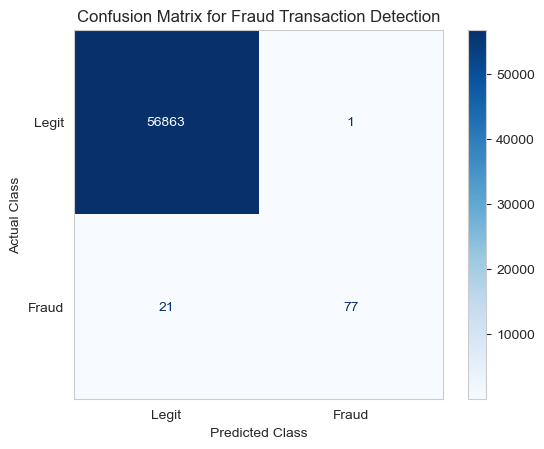

In [47]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (XGBoost)

Results for XGBoost (Base):
    Average Precision: 0.012246399012208547
    Average Recall   : 0.9818239101750561
    Average Threshold: 0.001447062473744154
    
    PR AUC           : 0.8910235405004653


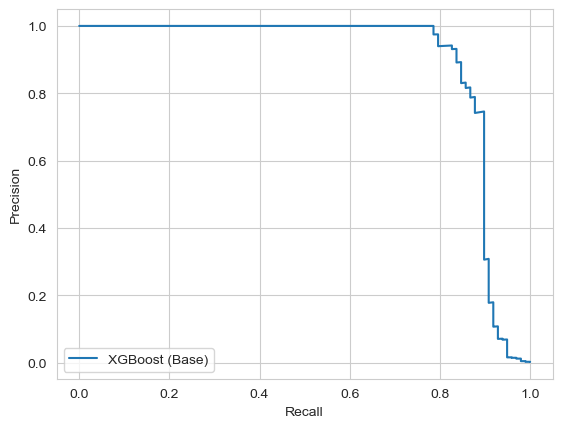

In [48]:
# Display PR Curve
xgb_yhat = xgb_model.predict_proba(X_test)
xgb_probs = xgb_yhat[:, 1]

plot_pr_curve(y_test, xgb_probs, 'XGBoost (Base)')

### CatBoost

In [49]:
# Create base CatBoost Model
cbc_model = CatBoostClassifier()

In [50]:
# Let's fit the model on the training dataset
cbc_model.fit(X_train, y_train, verbose=False)

### Features Importance (CatBoost)

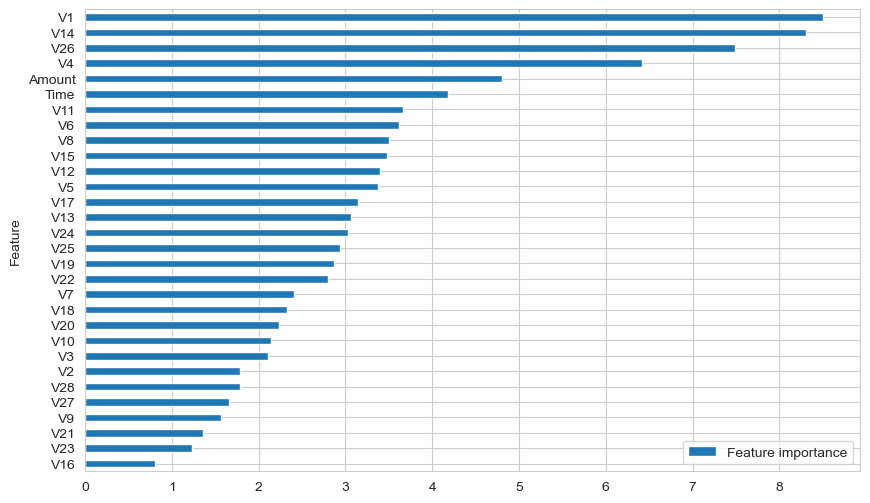

In [51]:
# Let's plot the important features
feature_importance = pd.DataFrame({'Feature': predictors, 'Feature importance': cbc_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=True)
feature_importance.plot(x='Feature', y='Feature importance', kind='barh', figsize=(10, 6)).legend(loc='lower right')

In [52]:
# Let's predict the target values
cbc_preds = cbc_model.predict(X_test)

### Confusion Matrix (CatBoost)

In [53]:
# Create the confusion matrix
cbc_conf_matrix = confusion_matrix(y_test, cbc_preds)

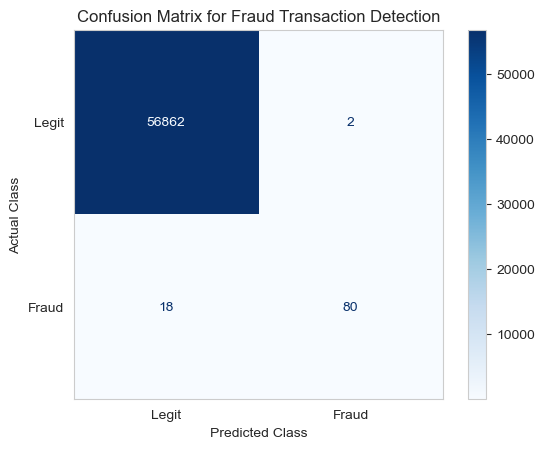

In [54]:
# Create the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cbc_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (CatBoost)

Results for CatBoost (Base):
    Average Precision: 0.012085294671035057
    Average Recall   : 0.9874275929722628
    Average Threshold: 0.001444835239459012
    
    PR AUC           : 0.8890037711697841


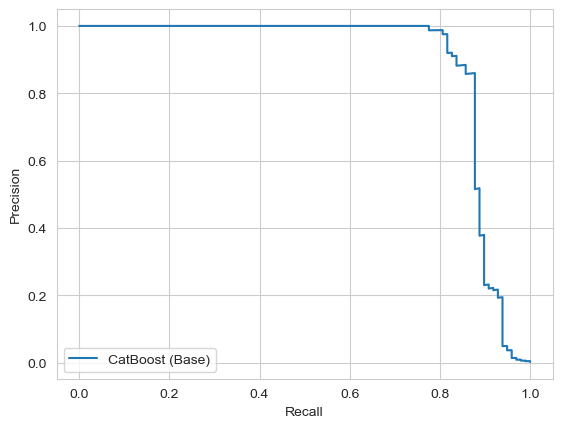

In [55]:
# Display PR Curve
cbc_yhat = cbc_model.predict_proba(X_test)
cbc_probs = cbc_yhat[:, 1]

plot_pr_curve(y_test, cbc_probs, 'CatBoost (Base)')

### LightGBM

In [56]:
# Create base LightGBM Model
lgb_model = LGBMClassifier()

In [57]:
# Let's fit the model on the training dataset
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


LGBMClassifier()

### Features Importance (LightGBM)

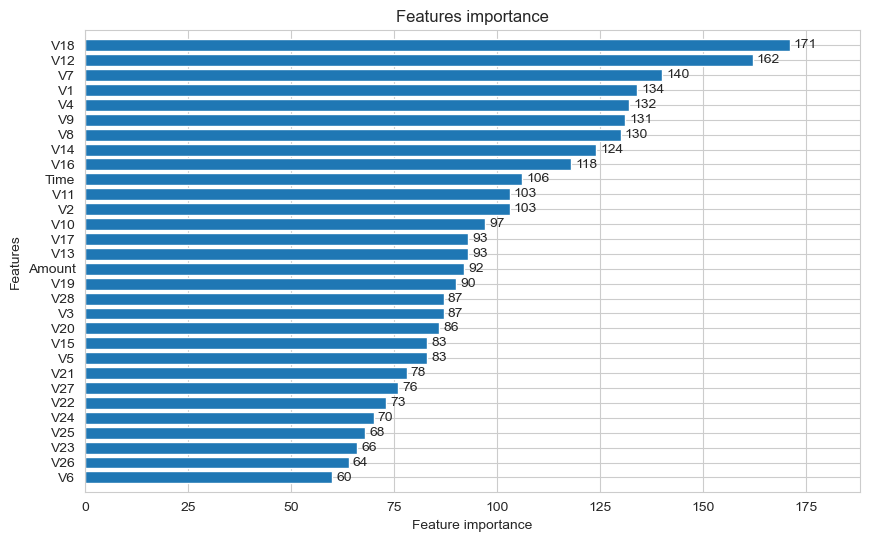

In [58]:
# Let's plot the important features
fig, (ax) = plt.subplots(ncols=1, figsize=(10,6))
lgb.plot_importance(lgb_model, height=0.8, title="Features importance", ax=ax) 
plt.show()

In [59]:
# Let's predict the target values
lgb_preds = lgb_model.predict(X_test)

### Confusion Marix (LightGBM)

In [60]:
# Create the confusion matrix
lgb_conf_matrix = confusion_matrix(y_test, lgb_preds)

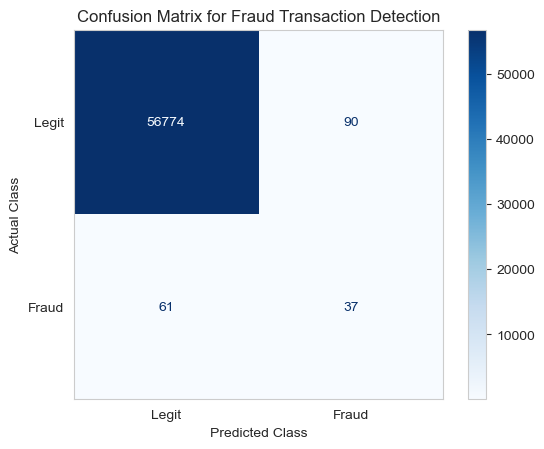

In [61]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=lgb_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (LightGBM)

Results for LightGBM (Base):
    Average Precision: 0.040913110075844465
    Average Recall   : 0.3804982906868331
    Average Threshold: 0.013537334112121715
    
    PR AUC           : 0.24899782750275593


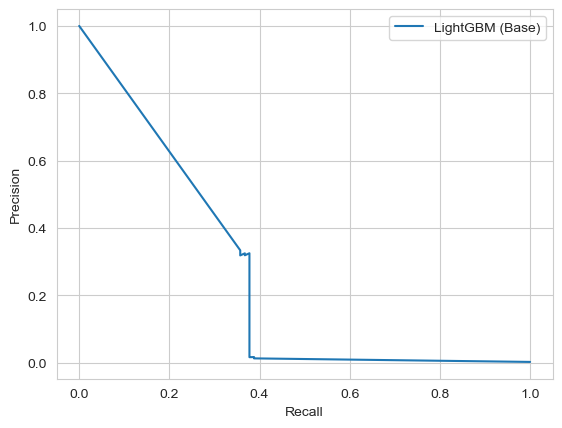

In [62]:
# Display PR Curve
lgb_yhat = lgb_model.predict_proba(X_test)
lgb_probs = lgb_yhat[:, 1]

plot_pr_curve(y_test, lgb_probs, 'LightGBM (Base)')

### Improving the Models

### Logistic Regression

In [63]:
# Define parameters for tuning using GridSearchCV and fit the model to find best params
lgr_params = [{'penalty':['l1', 'l2']}, 
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
lgr_tune = LogisticRegression(max_iter=1000)
lgr_grid = GridSearchCV(estimator = lgr_tune, param_grid = lgr_params, n_jobs=4, scoring='average_precision')
lgr_grid_start = time.time()
lgr_grid.fit(X_train, y_train)
lgr_grid_stop = time.time()
print(f'Logistic Regression Grid Search Time : {(lgr_grid_stop - lgr_grid_start): .8f}s')

Logistic Regression Grid Search Time :  90.61722207s


In [64]:
# Display the best params
lgr_grid.best_params_

{'C': 100}

In [65]:
# Let's predict the target values
lgr_grid_preds = lgr_grid.predict(X_test)

### Features Importance (Logistic Regression)

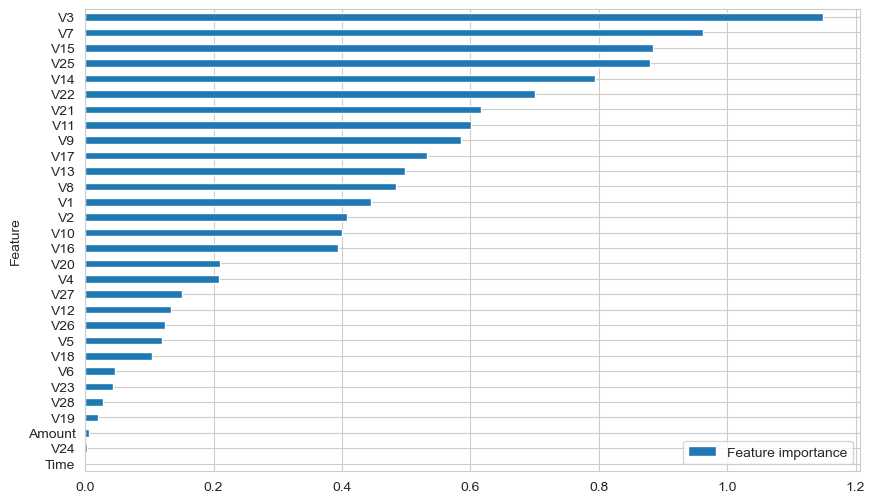

In [66]:
# Let's plot the important features
feature_importance = pd.DataFrame({'Feature': predictors, 
                                   'Feature importance': np.abs(lgr_grid.best_estimator_.coef_[0])})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=True)
feature_importance.plot(x='Feature', y='Feature importance', kind='barh', figsize=(10, 6)).legend(loc='lower right')

### Confusion Matrix (Logistic Regression)

In [67]:
# Create the confusion matrix
lgr_grid_conf_matrix = confusion_matrix(y_test, lgr_grid_preds)

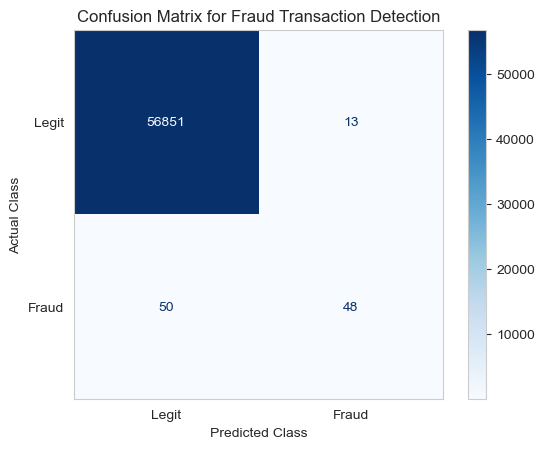

In [68]:
# Dsiplay the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=lgr_grid_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (LogisticRegression)

Results for Logistic Regression (Tuned):
    Average Precision: 0.010529453748600452
    Average Recall   : 0.9480949702998138
    Average Threshold: 0.0020011359041623867
    
    PR AUC           : 0.5725174166502492


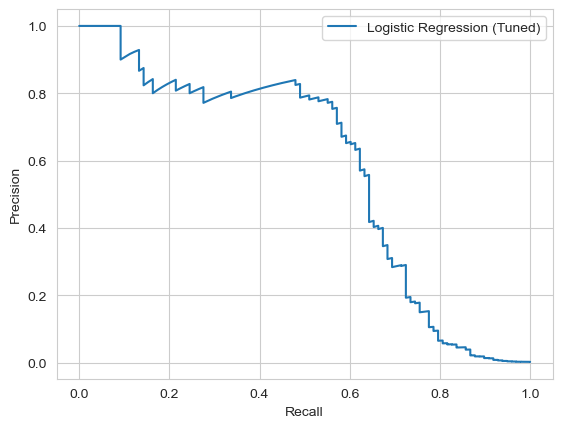

In [69]:
# Display PR Curve
lgr_grid_yhat = lgr_grid.predict_proba(X_test)
lgr_grid_probs = lgr_grid_yhat[:, 1]

plot_pr_curve(y_test, lgr_grid_probs, 'Logistic Regression (Tuned)')

### RandomForestClassifier

In [70]:
# Random Forest Classifier
# Use RandomizedSearchCV to find the hyperparameters best values
rfc_pipe = Pipeline([('rfc', RandomForestClassifier(random_state=42))])
rfc_params = {'rfc__n_estimators': [200, 300, 400],
              'rfc__max_features': ['sqrt', 'log2'], 
              'rfc__max_depth': range(1, 15, 2)
         }
rfc_grid = RandomizedSearchCV(estimator=rfc_pipe, 
                              n_iter = 10,
                              n_jobs=4,
                              param_distributions=rfc_params, 
                              scoring='average_precision')
rfc_grid_start = time.time()
rfc_grid.fit(X_train, y_train)
rfc_grid_stop = time.time()
print(f'RandomForestClassifier Grid Search Time : {(rfc_grid_stop - rfc_grid_start): .8f}s')

RandomForestClassifier Grid Search Time :  8010.81028605s


In [71]:
# Display the best params
rfc_grid.best_params_

{'rfc__n_estimators': 200, 'rfc__max_features': 'sqrt', 'rfc__max_depth': 13}

In [72]:
# Let's predict the target values
rfc_grid_preds = rfc_grid.predict(X_test)

### Confusion Matrix (Random Forest Classifier)

In [73]:
# Create the confusion matrix
rfc_grid_conf_matrix = confusion_matrix(y_test, rfc_grid_preds)

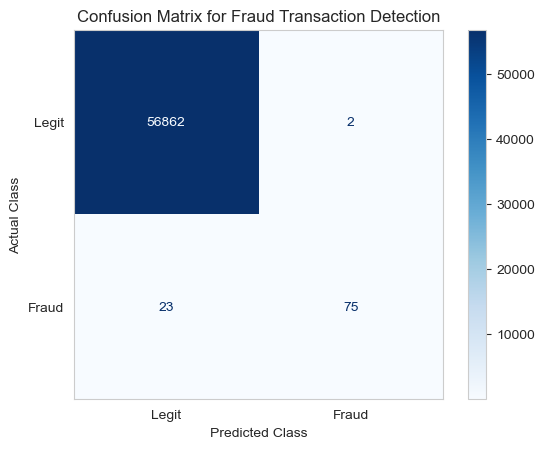

In [74]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rfc_grid_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (RandomForestClassifier)

Results for Random Forest (Tuned):
    Average Precision: 0.011871524390450902
    Average Recall   : 0.9796242402697489
    Average Threshold: 0.0012757761050802908
    
    PR AUC           : 0.8678248246069722


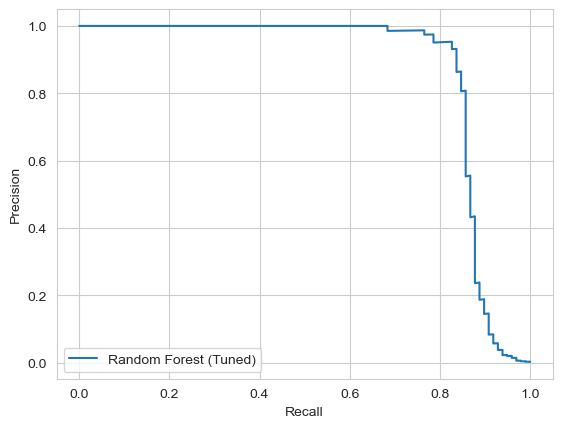

In [75]:
# Display PR Curve
rfc_grid_yhat = rfc_grid.predict_proba(X_test)
rfc_grid_probs = rfc_grid_yhat[:, 1]

plot_pr_curve(y_test, rfc_grid_probs, 'Random Forest (Tuned)')

### XGBoost

In [76]:
# Define the XGB params
xgb_params = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5],
              'subsample': [0.7, 0.8, 0.9],
              'colsample_bytree': [0.7, 0.8, 0.9],
              'max_depth': [2, 3, 4, 5]
             }

In [77]:
# Define the model with initial params
xgb_tune = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state=42, eta=.039, eval_metric = 'auc')

In [78]:
# Use RandomizedSearchCV to fine tune the hyperparameters
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_grid = RandomizedSearchCV(estimator=xgb_tune, 
                              param_distributions=xgb_params, 
                              n_iter=param_comb, 
                              scoring='average_precision', 
                              n_jobs=4, 
                              cv=skf.split(X_train,y_train), 
                              verbose=3, 
                              random_state=42
                       )

In [79]:
# Fit the training data to grid and find the best params
xgb_grid_start = time.time()
xgb_grid.fit(X_train, y_train)
xgb_grid_stop = time.time()
print(f'XGBoost Grid Search Time : {(xgb_grid_stop - xgb_grid_start): .8f}s')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[17:57:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoost Grid Search Time :  1252.48899460s


In [80]:
# Display the best params
xgb_grid.best_params_

{'subsample': 0.9,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [81]:
# Let's predict the target values
xgb_grid_preds = xgb_grid.predict(X_test)

### Confusion Matrix (XGBoost)

In [82]:
# Create the confusion matrix
xgb_grid_conf_matrix = confusion_matrix(y_test, xgb_grid_preds)

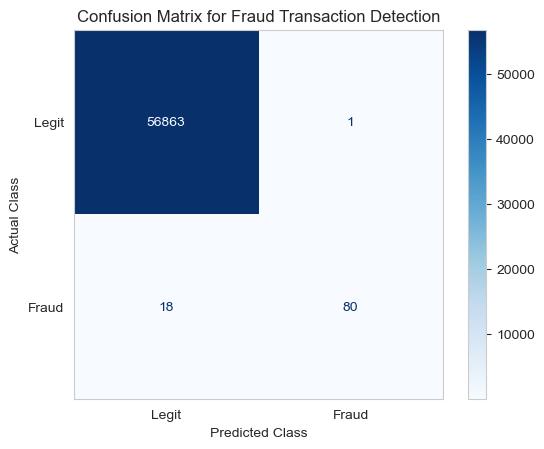

In [83]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_grid_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (XGBoost)

Results for XGBoost (Tuned):
    Average Precision: 0.012129993088881342
    Average Recall   : 0.9805543409654315
    Average Threshold: 0.0015606485540047288
    
    PR AUC           : 0.8905731797726807


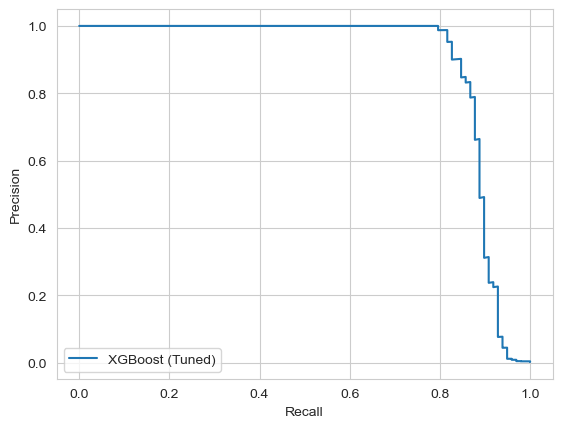

In [84]:
# Display PR Curve
xgb_grid_yhat = xgb_grid.predict_proba(X_test)
xgb_grid_probs = xgb_grid_yhat[:, 1]

plot_pr_curve(y_test, xgb_grid_probs, 'XGBoost (Tuned)')

### CatBoost Classifier

In [85]:
# Define the CatBoost Classifier params
cbc_params = {'depth': [4, 8, 12],
              'learning_rate': [0.01,0.02],
              'iterations': [250, 500]
             }

In [86]:
# Create CatBoost Classifier model with tuning parameters
cbc_tune = CatBoostClassifier(eval_metric='PRAUC',
                              random_seed = 42,
                              bagging_temperature = 0.2,
                              od_type='Iter',
                              metric_period = 50,
                              od_wait=100)

In [87]:
# Use RandomizedSearchCV to fine tune the hyperparameters
cbc_grid = RandomizedSearchCV(estimator=cbc_tune, 
                              param_distributions=cbc_params, 
                              scoring='average_precision', 
                              n_jobs=4, 
                              verbose=3, 
                              random_state=42
                             )

In [88]:
# Fit the training data to grid and find the best params
cbc_grid_start = time.time()
cbc_grid.fit(X_train, y_train)
cbc_grid_stop = time.time()
print(f'CatBoost Grid Search Time : {(cbc_grid_stop - cbc_grid_start): .8f}s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6551931	total: 85.1ms	remaining: 42.5s
50:	learn: 0.8509485	total: 2.93s	remaining: 25.8s
100:	learn: 0.8688340	total: 5.55s	remaining: 21.9s
150:	learn: 0.8881056	total: 8.73s	remaining: 20.2s
200:	learn: 0.9046759	total: 11.2s	remaining: 16.7s
250:	learn: 0.9151776	total: 12.9s	remaining: 12.8s
300:	learn: 0.9241753	total: 20.3s	remaining: 13.5s
350:	learn: 0.9327014	total: 29.5s	remaining: 12.5s
400:	learn: 0.9391375	total: 35.3s	remaining: 8.72s
450:	learn: 0.9469737	total: 40.1s	remaining: 4.36s
499:	learn: 0.9530185	total: 44.7s	remaining: 0us
CatBoost Grid Search Time :  51453.20834374s


In [89]:
# Display the best params
cbc_grid.best_params_

{'learning_rate': 0.02, 'iterations': 500, 'depth': 8}

In [90]:
# Let's predict the target values
cbc_grid_preds = cbc_grid.predict(X_test)

### Confusion Matrix (CatBoost)

In [91]:
# Create the confusion matrix
cbc_grid_conf_matrix = confusion_matrix(y_test, cbc_grid_preds)

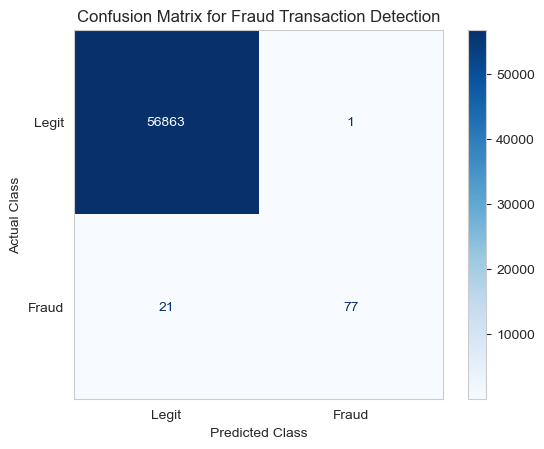

In [92]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cbc_grid_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (CatBoost)

Results for CatBoost (Tuned):
    Average Precision: 0.012009714576455712
    Average Recall   : 0.9838568070922762
    Average Threshold: 0.0015705161188444476
    
    PR AUC           : 0.8889531747157843


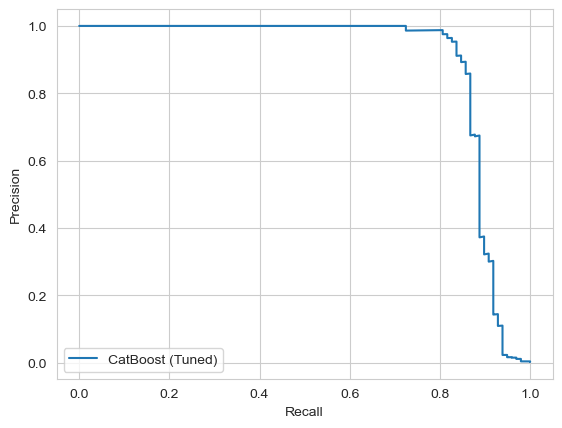

In [93]:
# Display PR Curve
cbc_grid_yhat = cbc_grid.predict_proba(X_test)
cbc_grid_probs = cbc_grid_yhat[:, 1]

plot_pr_curve(y_test, cbc_grid_probs, 'CatBoost (Tuned)')

### LightGBM 

In [94]:
# Define the XGB params
lgb_params = {'boosting_type': ['gbdt', 'dart', 'goss'],
              'learning_rate': [0.01,0.02, 0.05],
              'max_depth': [2, 4, 8, 12],
              'num_leaves': [5, 7, 9],
              'subsample':[0.5, 0.7, 0.9],
              'colsample_bytree':[0.5, 0.7, 0.9],
              'n_estimators': [200, 300, 500]
             }

In [95]:
# Create LightGBM Classifier model with tuning parameters
lgb_tune = LGBMClassifier(metric='aucpr',
                          objective = 'binary',
                          min_child_samples = 100,
                          max_bin=100,
                          subsample_freq=1,   
                          min_child_weight=0,
                          min_split_gain=0,
                          nthread=8,
                          verbose=0
                         )

In [96]:
# Use RandomizedSearchCV to fine tune the hyperparameters
lgb_grid = RandomizedSearchCV(estimator=lgb_tune, 
                              param_distributions=lgb_params, 
                              scoring='average_precision', 
                              n_jobs=4, 
                              verbose=3, 
                              random_state=42
                             )

In [97]:
# Fit the training data to grid and find the best params
lgb_grid_start = time.time()
lgb_grid.fit(X_train, y_train)
lgb_grid_stop = time.time()
print(f'LightGBM Grid Search Time : {(lgb_grid_stop - lgb_grid_start): .8f}s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
LightGBM Grid Search Time :  297.99970031s


In [98]:
# Display the best params
lgb_grid.best_params_

{'subsample': 0.5,
 'num_leaves': 9,
 'n_estimators': 500,
 'max_depth': 8,
 'learning_rate': 0.02,
 'colsample_bytree': 0.7,
 'boosting_type': 'dart'}

In [99]:
# Let's predict the target values
lgb_grid_preds = lgb_grid.predict(X_test)

### Confusion Matrix (LightGBM)

In [100]:
# Create the confusion matrix
lgb_grid_conf_matrix = confusion_matrix(y_test, lgb_grid_preds)

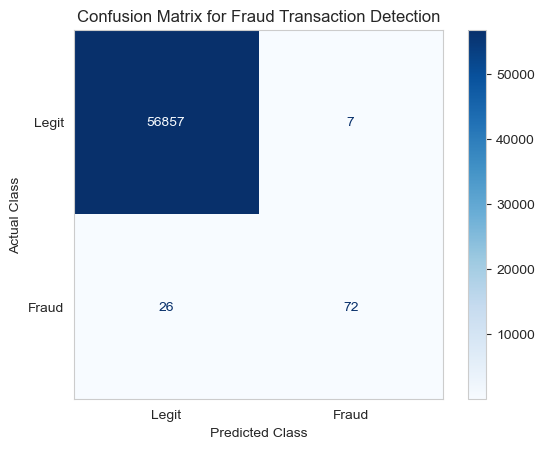

In [101]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=lgb_grid_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (LightGBM)

Results for LightGBM (Tuned):
    Average Precision: 0.031286185188285014
    Average Recall   : 0.9474667100672275
    Average Threshold: 0.0120804337573729
    
    PR AUC           : 0.867221068127284


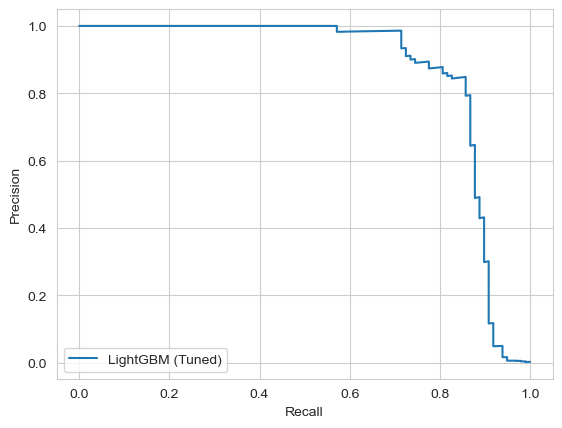

In [102]:
# Display PR Curve
lgb_grid_yhat = lgb_grid.predict_proba(X_test)
lgb_grid_probs = lgb_grid_yhat[:, 1]

plot_pr_curve(y_test, lgb_grid_probs, 'LightGBM (Tuned)')

### Best Model - XGBoost Classifier

In [103]:
# Define the model
xgb_best = xgb.XGBClassifier(objective='binary:logistic', 
                             eta=.039,
                             max_depth=5,
                             subsample=0.8,
                             colsample_bytree=0.9,
                             eval_metric = 'aucpr',
                             learning_rate=0.039, 
                             n_estimators=1000, 
                             nthread=1, 
                             random_state=42, 
                             n_jobs=4,                             
                            )

In [104]:
# Let's train the model
eval_set = [(X_test, y_test)]
xgb_best.fit(X_train, y_train, early_stopping_rounds=50, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eta=0.039, eval_metric='aucpr',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.039, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=4, nthread=1,
              num_parallel_tree=None, ...)

In [105]:
# Let's predict the target values
xgb_best_preds = xgb_best.predict(X_test)

### Features Importance (Best Model)

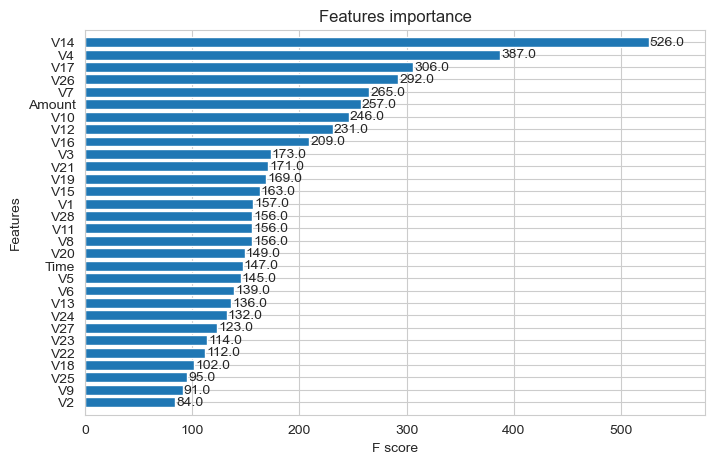

In [106]:
# Let's plot the important features
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(xgb_best, height=0.8, title="Features importance", ax=ax) 
plt.show()

In [107]:
# Let's predict the target values
xgb_best_preds = xgb_best.predict(X_test)

### Confusion Matrix (Best Model)

In [108]:
# Create the confusion matrix
xgb_best_conf_matrix = confusion_matrix(y_test, xgb_best_preds)

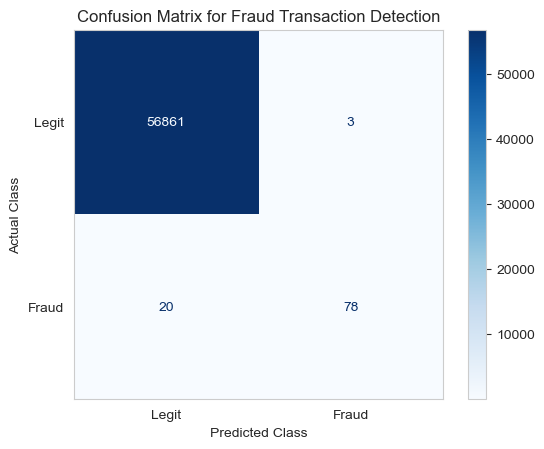

In [109]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_best_conf_matrix, display_labels=['Legit', 'Fraud' ])
disp.plot(cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Fraud Transaction Detection')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.grid(False)
plt.show();

### Precision-Recall Area Under Curve (Best Model)

Results for Best Model - XGBoost:
    Average Precision: 0.012473995763017184
    Average Recall   : 0.9803532193767619
    Average Threshold: 0.001666952040977776
    
    PR AUC           : 0.8927838321448286


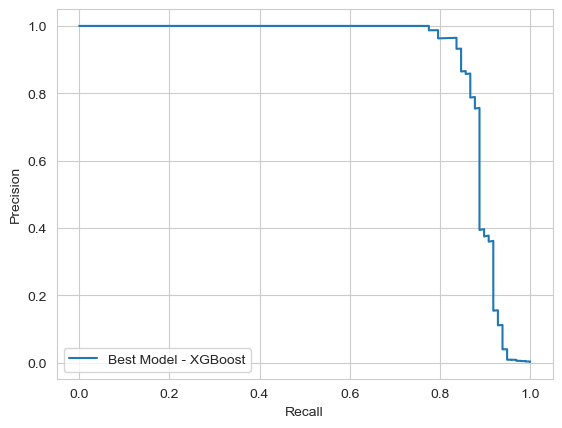

In [110]:
# Display PR Curve
xgb_best_yhat = xgb_best.predict_proba(X_test)
xgb_best_probs = xgb_best_yhat[:, 1]

plot_pr_curve(y_test, xgb_best_probs, 'Best Model - XGBoost')

### Compare the Models

In [111]:
# Display the results for all the models
results_df.transpose()

,Precision,Recall,PR AUC
Logistic Regression (Base),1.053047,94.806682,57.305675
Random Forest (Base),87.000442,67.378336,86.854883
XGBoost (Base),1.224640,98.182391,89.102354
CatBoost (Base),1.208529,98.742759,88.900377
LightGBM (Base),4.091311,38.049829,24.899783
Logistic Regression (Tuned),1.052945,94.809497,57.251742
Random Forest (Tuned),1.187152,97.962424,86.782482
XGBoost (Tuned),1.212999,98.055434,89.057318
CatBoost (Tuned),1.200971,98.385681,88.895317
LightGBM (Tuned),3.128619,94.746671,86.722107


In [112]:
# Change the datatype of score_df columns to float
for i in results_df.columns:
    results_df[i] = results_df[i].astype(float)
model_score = results_df.loc['PR AUC']

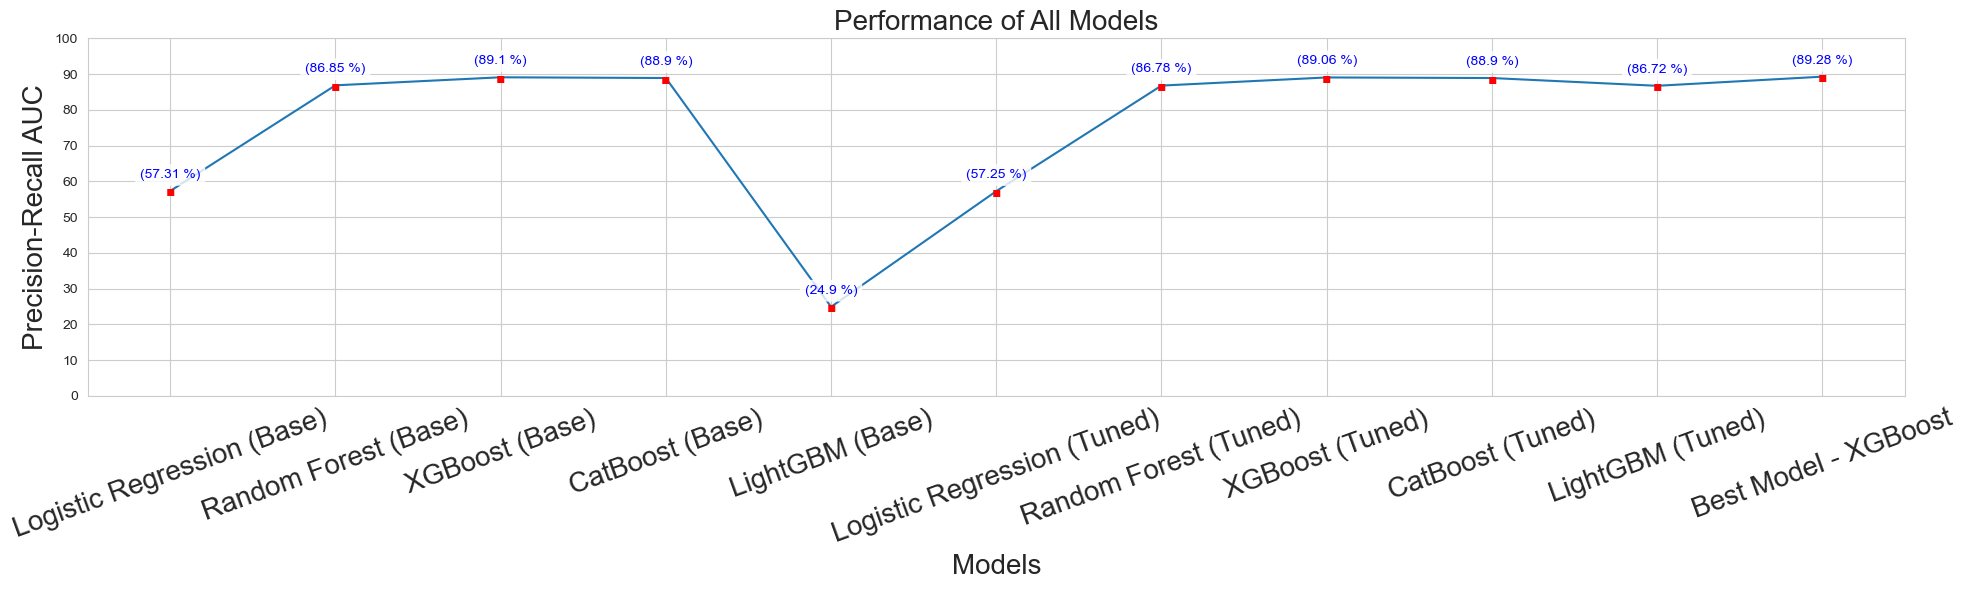

In [115]:
# Plot the performance of all the model used for prediction
x=list(range(len(model_score)))
y=list(range(0,101,10))

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_score)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (20))
plt.xlabel("Models",fontsize=20)
plt.ylabel("Precision-Recall AUC",fontsize=20)
plt.title("Performance of All Models",fontsize=20)
for i,j in zip(x,y):
    j = model_score[i]
    val = "(" + str(round(model_score[i],2)) + " %)"
    plt.text(i, j+4.5, val,horizontalalignment='center',verticalalignment='center',color='blue',bbox=props)
    plt.text(i, j+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.show()

**Observations**
- Betweeen "base" model, LightGBM performed the worst and XGBoost the best.
- Overall, Logistic Regression was least performing and XGBoost the best.
- CatBoost almost performed as good as XGBoost, in fact had a better Recall score than XGBoost.

### Results and Conclusion

Since the goal was to detect fraud, the Precision-Recall performance metrics was used to compare various models. Multiple classifier models were created and the best model provided the performance score of **~90%**. There were other classifier models that were not too far from the best. The models were tested with default threshold of 0.50 (i.e. 50% probability of fraud).

### Recommendation to the Card Companies

Predictive models can be highly effective but there's also room for configuration. One such parameter that can be controlled by a Card Company is decision boundary threshold parameter. Current models were tested with the default value of 0.50 (i.e. 50% probability of fraud).

When a threshold is **0.90** - Such a high threshold exudes confidence in predictions and thereby missing out on some fraudulent transactions. Such a scenario is not desirable despite high Precision. Can you think of why?
It is because the business ends up paying a higher cost of missing out on fraud identification which is the sole purpose of building such a model. Note that the cost of a fraudulent transaction is much higher than the cost involved in blocked but legit transactions. 

When a threshold is **0.40** - Such a liberal threshold would block the majority of the transactions, which can annoy many customers. Not to forget the additional burden on human resources to work through the flagged transactions and identify the true frauds.

Thus, whether a transaction is predicted as fraudulent or legit depends largely on the threshold value. Thus it must be carefully chosen by business to find the right balance.

### Next Steps

- The models were tuned with limited number of hyperparameters due to computational restrictions. More options can be tried to see if models can be improved further.
- Since the dataset is highly imbalanced, more sophisticated techniques can be applied to handle this, such as Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic Sampling (ADASYN). These can help improve model performance by balancing the dataset.
- Tuning existing models further or ensembling different models could futher enhance performance.